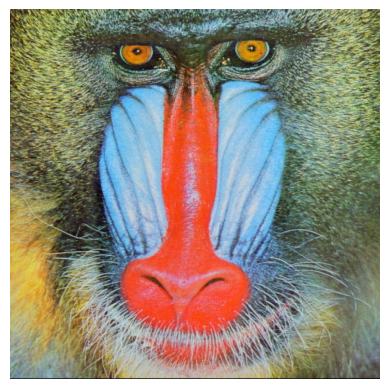

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image1 = cv2.imread('HamletContainer.png')
image = image1;
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
height, width, channels = image1.shape
plt.imshow(image1) 
plt.axis('off')
plt.show()

In [38]:
message = ""
file_path = '../hamlet.txt'
# Open and read the file
with open(file_path, 'r') as file:
    message = file.read()

def text_to_binary(message):
    return ''.join(format(ord(char), '08b') for char in message)
binMessage = text_to_binary(message)
print("Converted")

Converted


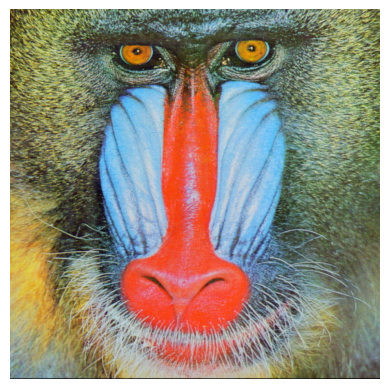

In [34]:
def embedMessageInImage(image, message):
    index = 0
    message += "".zfill(8)
    if(len(message) > height*width*channels):
        print("Impossible to embed the message")
    for x in range(width):
        for y in range(height):
            pixel = image[y, x]
            for channel in range(channels):
                if(index < len(message)):
                    pixel[channel] = pixel[channel] & ~1 | int(message[index])
                    index += 1
    return image
image1 = embedMessageInImage(image1, binMessage)
cv2.imwrite('Untitled2.png', image1)
plt.imshow(image1) 
plt.axis('off')
plt.show()


In [40]:
def extract_message(image):
    index = 0
    message = ""
    char = ""
    message_retrieved = False
    for x in range(width):
        if(message_retrieved): 
            break
        for y in range(height):
            pixel = image[y, x]
            for channel in range(channels):
                LSB = bin(pixel[channel])[2:].zfill(8)[7]
                char += LSB
                if len(char) % 8 == 0:
                    newChar = chr(int(char, 2))
                    char = ""
                    if(newChar == '\0'):
                        print("message retrieved")
                        return message
                    else:
                        message += newChar
extracted_message = extract_message(image1)
print(extracted_message[:2000])

message retrieved
The Project Gutenberg eBook of Hamlet
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Hamlet


Author: William Shakespeare

Release date: June 1, 1999 [eBook #1787]
                Most recently updated: May 24, 2019

Language: English



*** START OF THE PROJECT GUTENBERG EBOOK HAMLET ***
This etext is a typo-corrected version of Shakespeare's Hamlet,
Project Gutenberg file 1ws2610.txt.


*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT